In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [99]:
seed = 1234
bootstrap = False
num_lstms = 1
M = 5
length_scale = 0
T = 100
tao = 1.0
dropout = 0
exp = 1
train_data_name = 'simulate_crossing'
test_data_name = 'simulate_crossing_two_people_test'
# test_data_name = 'simulate_overtaking'

parent_path = "log/%s/seed_%d_bootstrap_%s_M_%d/" % (
                train_data_name,
                seed, 
                str(bootstrap), 
                M, 
                ) 
print('the parent path of the model: \n%s' % parent_path)
train_path = parent_path + "test/%s" % train_data_name
val_path = parent_path + "test/%s" % test_data_name

the parent path of the model: 
log/simulate_crossing/seed_1234_bootstrap_False_M_5/


In [100]:
if bootstrap:
    train_save_fig_path = 'figures/' + train_data_name + '/bootstrap'
    test_save_fig_path = 'figures/' + test_data_name + '/bootstrap' 
else:
    train_save_fig_path = 'figures/' + train_data_name
    test_save_fig_path = 'figures/' + test_data_name
if not os.path.exists(train_save_fig_path):
    os.makedirs(train_save_fig_path)
    os.makedirs(test_save_fig_path)

In [101]:
train_var_x = np.load(train_path + '/val_var_x.npy')
train_data_uncertainty = np.load(train_path + '/val_data_uncertainty.npy')
train_model_uncertainty = np.load(train_path + '/val_model_uncertainty.npy')
train_seq_lengths = np.load(train_path + '/val_seq_lengths.npy')

val_var_x = np.load(val_path + '/val_var_x.npy')
val_data_uncertainty = np.load(val_path + '/val_data_uncertainty.npy')
val_model_uncertainty = np.load(val_path + '/val_model_uncertainty.npy')
val_seq_lengths = np.load(val_path + '/val_seq_lengths.npy')

In [102]:
def get_variance(seq_lengths, cov):
    sigma_x = []
    sigma_y = []
    for i, seq_len in enumerate(seq_lengths):
        sigma_x.append(cov[0:seq_len, i, 0:1, 0])
        sigma_y.append(cov[0:seq_len, i, 1:2, 1])
    sigma_x = np.vstack(sigma_x)
    sigma_y = np.vstack(sigma_y)
    return np.hstack((sigma_x, sigma_y))

In [103]:
train_data_uncertainty = get_variance(train_seq_lengths, train_data_uncertainty)
train_model_uncertainty = get_variance(train_seq_lengths, train_model_uncertainty)

val_data_uncertainty = get_variance(val_seq_lengths, val_data_uncertainty)
val_model_uncertainty = get_variance(val_seq_lengths, val_model_uncertainty)

In [104]:
VAR_UPPER_BOUND = 0.03

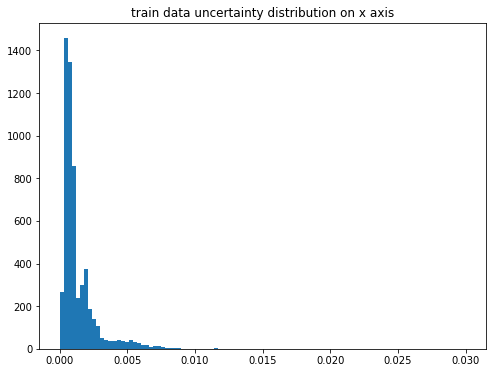

In [105]:
fig = plt.figure(figsize=(8, 6))
plt.hist(train_data_uncertainty[:, 0], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('train data uncertainty distribution on x axis')
plt.show()
fig.savefig(train_save_fig_path + '/train_data_uncertainty_x.png' )

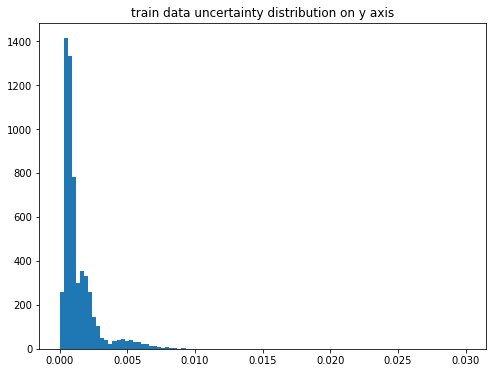

In [106]:
fig = plt.figure(figsize=(8, 6))
plt.hist(train_data_uncertainty[:, 1], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('train data uncertainty distribution on y axis')
plt.show()
fig.savefig(train_save_fig_path + '/train_data_uncertainty_y.png' )

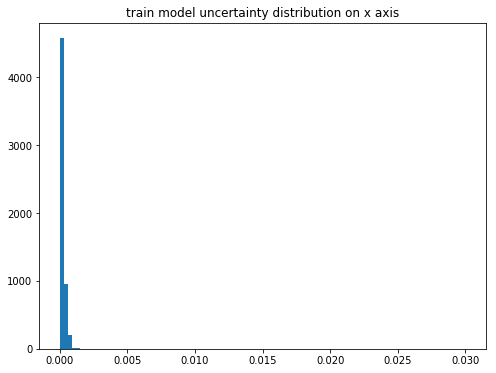

In [107]:
fig = plt.figure(figsize=(8, 6))
plt.hist(train_model_uncertainty[:, 0], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('train model uncertainty distribution on x axis')
plt.show()
fig.savefig(train_save_fig_path + '/train_model_uncertainty_x.png' )

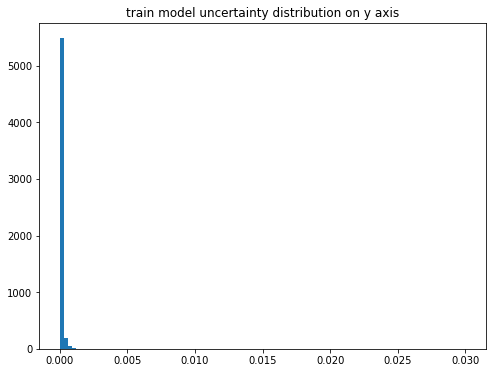

In [108]:
fig = plt.figure(figsize=(8, 6))
plt.hist(train_model_uncertainty[:, 1], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('train model uncertainty distribution on y axis')
plt.show()
fig.savefig(train_save_fig_path + '/train_model_uncertainty_y.png' )

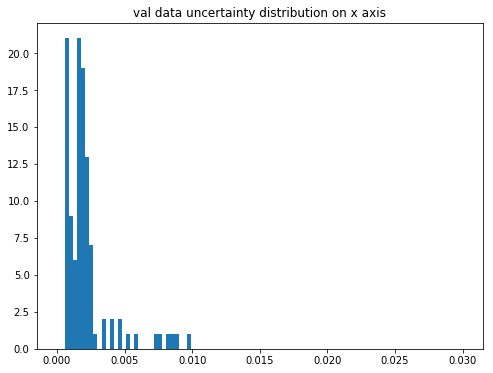

In [109]:
fig = plt.figure(figsize=(8, 6))
plt.hist(val_data_uncertainty[:, 0], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('val data uncertainty distribution on x axis')
plt.show()
fig.savefig(test_save_fig_path + '/test_data_uncertainty_x.png' )

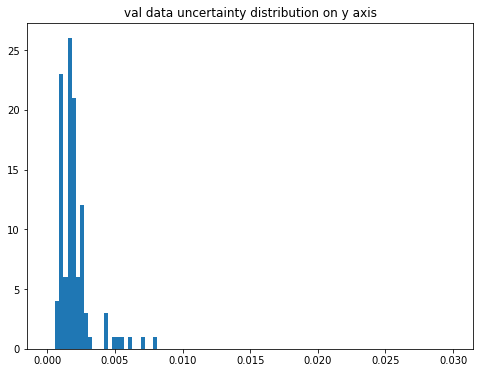

In [110]:
fig = plt.figure(figsize=(8, 6))
plt.hist(val_data_uncertainty[:, 1], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('val data uncertainty distribution on y axis')
plt.show()
fig.savefig(test_save_fig_path + '/test_data_uncertainty_y.png' )

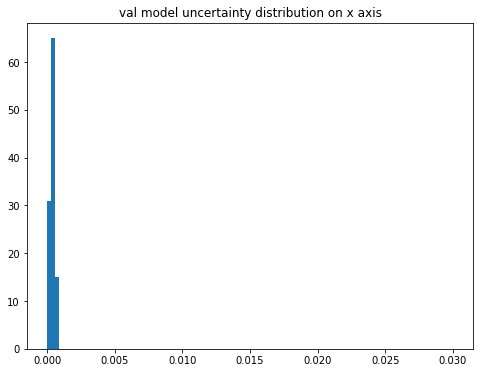

In [111]:
fig = plt.figure(figsize=(8, 6))
plt.hist(val_model_uncertainty[:, 0], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('val model uncertainty distribution on x axis')
plt.show()
fig.savefig(test_save_fig_path + '/test_model_uncertainty_x.png' )

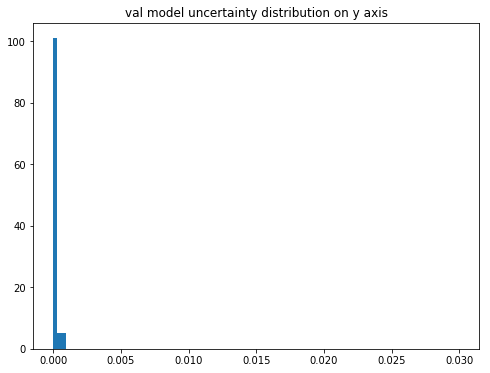

In [112]:
fig = plt.figure(figsize=(8, 6))
plt.hist(val_model_uncertainty[:, 1], bins=100, range=(0, VAR_UPPER_BOUND))
plt.title('val model uncertainty distribution on y axis')
plt.show()
fig.savefig(test_save_fig_path + '/test_model_uncertainty_y.png' )

In [113]:
np.mean(val_model_uncertainty[:, 1])

0.00012752565246931203

In [114]:
np.mean(val_model_uncertainty[:, 0])

0.00040655673181571

In [115]:
np.mean(train_model_uncertainty[:, 0])

0.00019877388090571563

In [116]:
np.max(train_model_uncertainty[:, 0])

0.0131962476298213

1.4177057892084122e-06

0.0023050401359796524

In [119]:
np.min(train_model_uncertainty[:, 0])

1.153559423983097e-06

In [120]:
np.max(train_model_uncertainty[:, 0])

0.0131962476298213

In [121]:
np.max(val_model_uncertainty[:, 0])

0.000718545401468873

In [122]:
np.min(val_model_uncertainty[:, 0])

0.0001477708574384451

In [128]:
np.min(train_model_uncertainty[:, 1])

1.4177057892084122e-06

In [127]:
np.max(train_model_uncertainty[:, 1])

0.0023050401359796524

In [129]:
np.max(val_model_uncertainty[:, 1])

0.0008319132030010223

In [130]:
np.min(val_model_uncertainty[:, 1])

2.1459884010255337e-05

In [131]:
np.mean(train_model_uncertainty[:, 0])

0.00019877388090571563

In [132]:
np.mean(val_model_uncertainty[:, 0])

0.00040655673181571

In [133]:
np.mean(val_model_uncertainty[:, 1])

0.00012752565246931203

In [135]:
np.mean(train_model_uncertainty[:, 1])

0.00011684704315759456